# Model Development Playground

This is the environment where I'll try to derive a model to generate random covert networks with the same analytical features presented in the `hello.ipynb` file.

In [21]:
import matplotlib as mpl
import numpy as np
import networkx as nx
import scipy
import scipy.stats
import math
import matplotlib.pyplot as plt

import random

In [72]:
def g_process_degreeSequencePDF(degreeSequence):
    max_degree = max(degreeSequence)
    retx, rety = [], []
    normalization_condition = len(degreeSequence)
    for k in range(max_degree + 1):
        count = 0
        for l in degreeSequence:
            if l == k:
                count += 1
        retx.append(k)
        rety.append(count / normalization_condition)
    return retx, rety

In [31]:
def draw_graph(graph):
    hoohaa = plt.figure(figsize=(10, 10))
    ax1 = hoohaa.subplots(1, 1)
    nx.draw_kamada_kawai(graph)

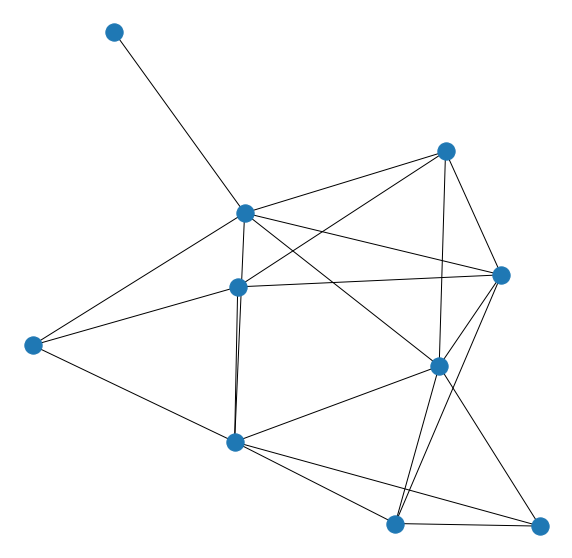

In [542]:
## initial growth stage

covert = nx.Graph()

growth_phase = nx.erdos_renyi_graph(10, 0.5)
covert.add_nodes_from(growth_phase.nodes())
covert.add_edges_from(growth_phase.edges())

draw_graph(covert)

In [145]:
def P_add(B, C):
    B = 1 - B # this is to invert the parameter
    heehoo = random.uniform(0, 1) * C
    if heehoo <= B:
        return True
    return False

In [146]:
def add_node(C):
    node_id = covert.number_of_nodes()
    covert.add_node(node_id)
    aaaa = nx.betweenness_centrality(covert)
    count = 0
    for key in aaaa:
        if P_add(aaaa[key], C):
            if count < 3:
                covert.add_edge(node_id, key)
            count += 1

In [199]:
def add_internal_edges(C, CC):
    global covert
    dseq = covert.degree()
    edges_to_add = []
    for node in covert:
        for node2 in covert:
            dk = np.abs(dseq[node] - dseq[node2])
            P_connection = (1/C) * np.exp(-dk / C) + CC
            haaa = random.uniform(0, 1)
            if haaa <= P_connection:
                edges_to_add.append((node, node2))
    covert.add_edges_from(edges_to_add)

In [148]:
def remove_node(mu, C):
    global covert
    dseq = covert.degree()
    covert_copy = nx.Graph()
    covert_copy.add_nodes_from(covert.nodes())
    covert_copy.add_edges_from(covert.edges())
    for node in covert.nodes():
        P_del = None
        node_degree = dseq[node]
        if node_degree > mu:
            P_del = (np.abs(node_degree - mu))^mu
        else:
            P_del = (np.abs(mu - node_degree))^(len(dseq) - mu)
        aaaa = random.uniform(0, 1) * C
        if aaaa <= P_del:
            covert_copy.remove_node(node)
    return covert_copy

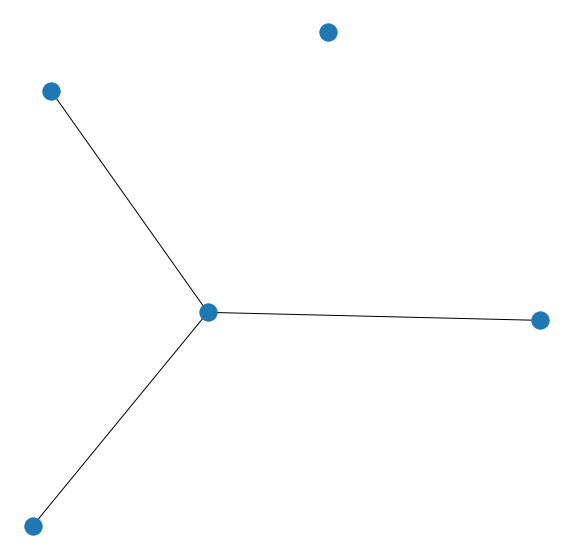

In [579]:
# all_networks = []
# covert = None

# for k in range(20):

covert = nx.Graph()

growth_phase = nx.erdos_renyi_graph(5, 0.5)
covert.add_nodes_from(growth_phase.nodes())
covert.add_edges_from(growth_phase.edges())

draw_graph(covert)

cycles = 20
for l in range(cycles):
    for k in range(2):
        add_internal_edges(1.5, -0.5)
        add_node(1)

    for k in range(2):
        remove_node(0, 0.25)

#     all_networks.append(covert)

In [441]:
def g_compute_standardNormal(x):
    return np.exp(-1 * x*x / 2) / np.sqrt(2 * np.pi)

def g_compute_flDistribution(x, gamma, beta, mu):
    return (
        (np.sqrt(
            (x - mu) / beta
        ) + np.sqrt(
            beta / (x - mu)
        )) / (2 * gamma * (x - mu))
    ) * g_compute_standardNormal(
        (np.sqrt(
            (x - mu) / beta
        ) - np.sqrt(
            beta / (x - mu)
        )) / gamma
    )

[ 5.09800297e-02  1.00000000e+02 -8.74535425e+01]


Text(0.5, 1.0, 'Generated Network Degree Distribution vs Theoretical Fit')

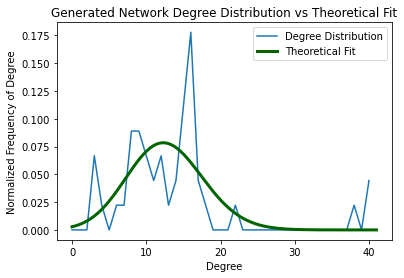

In [580]:
deg_seq = [d for n, d in covert.degree()]

x, y = g_process_degreeSequencePDF(deg_seq)
plt.plot(x, y, label="Degree Distribution")

params, covar = scipy.optimize.curve_fit(g_compute_flDistribution, x, y, bounds=([0.000000000001, 0.000000000000001, -100.], [100., 100., -0.00000000000000001]))
print(params)

x1 = np.linspace(0, len(x), num=200)
y1 = [g_compute_flDistribution(k, *params) for k in x1]
plt.plot(x1, y1, '-', linewidth=3, color='darkgreen', label="Theoretical Fit")

plt.legend()
plt.xlabel("Degree")
plt.ylabel("Normalized Frequency of Degree")
plt.title("Generated Network Degree Distribution vs Theoretical Fit")

Text(0.5, 1.0, 'B versus C')

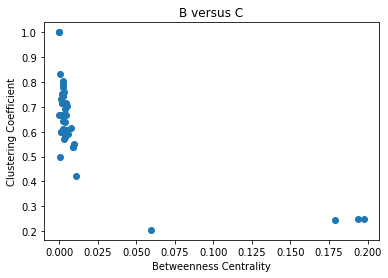

In [582]:
B = nx.betweenness_centrality(covert)
B_list = list(B.values())

C = nx.clustering(covert)
C_list = list(C.values())

plt.scatter(B_list, C_list)
plt.xlabel("Betweenness Centrality")
plt.ylabel("Clustering Coefficient")
plt.title("B versus C")

Text(0.5, 1.0, 'Colormap of Betweenness Assortativity \nMixing Matrix for Generated Data\n')

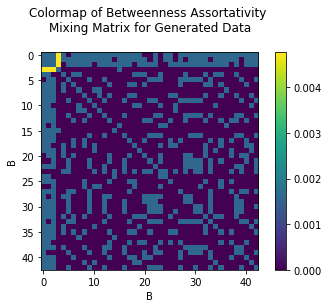

In [565]:
nx.set_node_attributes(covert, nx.betweenness_centrality(covert), "betweenness")
A = nx.attribute_mixing_matrix(covert, "betweenness")

# hoohaa = plt.figure(figsize=(10, 10))
# ax1 = hoohaa.subplots(1, 1)
# ax1.hist(x_hoohaa, y_hoohaa)

plt.imshow(A)
plt.colorbar()
plt.xlabel("B")
plt.ylabel("B")
plt.title("Colormap of Betweenness Assortativity \nMixing Matrix for Generated Data\n")

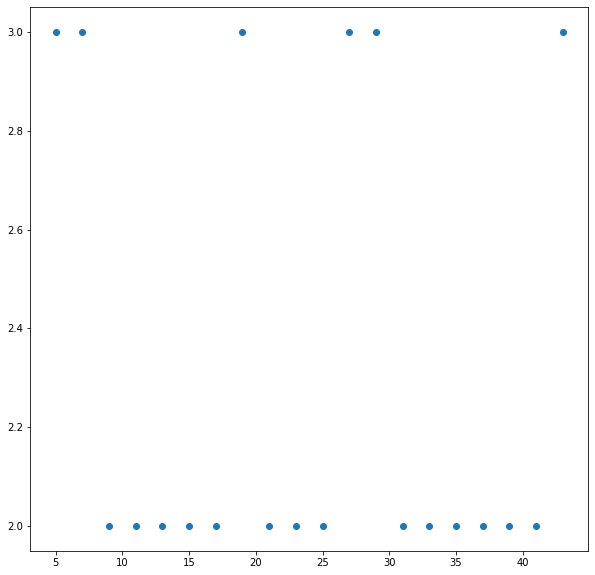

In [551]:
hoohaa = plt.figure(figsize=(10, 10))
ax1 = hoohaa.subplots(1, 1)

hoohaax = []
hoohaay = []

for nw in all_networks:
    N = nw.number_of_nodes()
    giant = nw.subgraph(list(max(nx.connected_components(nw), key=len)))
    d = nx.diameter(giant)
    hoohaax.append(N)
    hoohaay.append(d)

ax1.scatter(hoohaax, hoohaay)